# Hotel Booking Demand - Baseline Models

## Introduction
This notebook establishes **baseline machine learning models** for the Hotel Booking Demand dataset.  
The goal is to predict **reservation cancellations (`is_canceled`)** using simple models before moving on to feature engineering and advanced approaches.  

## Data Loading & Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/processed/hotel_booking_clean.csv')

print("Dataset shape:", df.shape)
df.head()

Dataset shape: (87370, 30)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87370 entries, 0 to 87369
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87370 non-null  object 
 1   is_canceled                     87370 non-null  int64  
 2   lead_time                       87370 non-null  int64  
 3   arrival_date_year               87370 non-null  int64  
 4   arrival_date_month              87370 non-null  object 
 5   arrival_date_week_number        87370 non-null  int64  
 6   arrival_date_day_of_month       87370 non-null  int64  
 7   stays_in_weekend_nights         87370 non-null  int64  
 8   stays_in_week_nights            87370 non-null  int64  
 9   adults                          87370 non-null  int64  
 10  children                        87370 non-null  float64
 11  babies                          87370 non-null  int64  
 12  meal                            

## Preparing Features & Target

In [3]:
# Define features and target

features = [
    'hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
    'stays_in_weekend_nights', 'stays_in_week_nights',
    'adults', 'children', 'babies',
    'meal', 'market_segment', 'distribution_channel',
    'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled',
    'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type',
    'days_in_waiting_list', 'customer_type', 'adr',
    'required_car_parking_spaces', 'total_of_special_requests'
]

target = 'is_canceled'

X = df[features]
y = df['is_canceled']

In [7]:
from sklearn.model_selection import train_test_split

# Convert categorical features using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Majority Class

As a trivial baseline, we always predict the most frequent outcome (majority class). This provides a performance floor to evaluate machine learning models against.

In [5]:
# Calculate the percentage of bookings that were not canceled to use as a baseline

not_canceled_pct = (df['is_canceled'].value_counts(normalize=True)[0] * 100)
print(f"Percentage not canceled: {not_canceled_pct:.2f}%")

Percentage not canceled: 72.51%


## Decision Tree

We start with a **Decision Tree** model, a simple and interpretable baseline.

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy*100:.2f}%")
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 75.39%
              precision    recall  f1-score   support

           0       0.83      0.83      0.83     12700
           1       0.55      0.56      0.55      4774

    accuracy                           0.75     17474
   macro avg       0.69      0.69      0.69     17474
weighted avg       0.76      0.75      0.75     17474



## Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


num_features = df.select_dtypes(include=["int64","float64"]).columns.drop("is_canceled")
cat_features = df.select_dtypes(include=["object"]).columns
StandardScaler().fit_transform(X)

lr = LogisticRegression(max_iter=1000, solver="liblinear", random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {lr_accuracy*100:.2f}%")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 79.11%
              precision    recall  f1-score   support

           0       0.81      0.93      0.87     12700
           1       0.70      0.41      0.52      4774

    accuracy                           0.79     17474
   macro avg       0.75      0.67      0.69     17474
weighted avg       0.78      0.79      0.77     17474



## Results Comparison

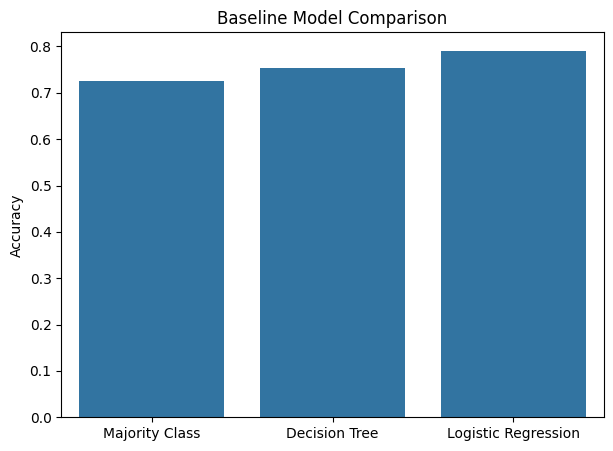

In [ ]:
# Collect results
results = {
    "Majority Class": not_canceled_pct / 100,
    "Decision Tree": dt_accuracy,
    "Logistic Regression": lr_accuracy
}

# Plot
plt.figure(figsize=(7,5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylabel("Accuracy")
plt.title("Baseline Model Comparison")
plt.show()

## Summary
* The majority‑class baseline sets a floor for performance.  
* Logistic Regression typically provides a strong linear reference point.  